In [2]:
import tensorflow as tf
import tensorflow_probability as tfp
tfd = tfp.distributions

import matplotlib.pyplot as plt
import numpy as np

# Multivariate distributions [tensorflow_probability]

## Multivariate Normal

### initialization

- 'scale_diag' arguments : covariance matrix (default = identity covariance matrix(spherical covariance matrix))
- event_shape = un-empty

In [4]:
# scale_diag : covariance matrix (default = identity covariance matrix(spherical covariance matrix))

mv_normal = tfd.MultivariateNormalDiag(loc=[-1, 0.5], scale_diag=[1., 1.5])
print(mv_normal)

tfp.distributions.MultivariateNormalDiag("MultivariateNormalDiag", batch_shape=[], event_shape=[2], dtype=float32)


In [5]:
mv_normal.event_shape

TensorShape([2])

In [6]:
mv_normal.batch_shape

TensorShape([])

### sampling

In [9]:
mv_normal.sample(3)

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[-0.19864929,  1.4205898 ],
       [-2.1336174 , -0.18106163],
       [-0.50069845,  3.7329636 ]], dtype=float32)>

### batched distribution(normal)

In [12]:
batched_normal = tfd.Normal(loc=[-1, 0.5], scale=[1., 1.5])
print(batched_normal)

tfp.distributions.Normal("Normal", batch_shape=[2], event_shape=[], dtype=float32)


In [13]:
batched_normal.sample(3)

<tf.Tensor: shape=(3, 2), dtype=float32, numpy=
array([[-0.10059452,  1.0499368 ],
       [-2.3967195 ,  2.065206  ],
       [-1.2776921 ,  0.7675866 ]], dtype=float32)>

```python
Multi_variate normal(변량=2)의 sample(3)의 shape(3,2)와 
Uni_variate normal(배치=2)의 sample(3)의 shape(3,2)가 같다.

So, What's difference between these two distributions and samples?

Multi_variate normal 
: 1 distribution of 2 dimensional random variable (because of event_shape=[2])
    -> 'log_prob' returns single log-probability value
    
Uni_variate normal(Normal) 
: 2 distribution of 1 dimensional(single) random variable (becuase of event_shape=[2])
    -> 'log_prob' returns multi log-probability values per each components of batchs

```

In [19]:
# 위의 mv_normal과 batched_normal의 본질적인 차이는 log_prob을 통해 확인할 수 있다.
# mv_normal.log_prob([-0.2, 1.8]) : single realization of '2' dimensional random variables 
### -> return 'single' log_prob values

print(mv_normal)
print(mv_normal.log_prob([-0.2, 1.8]))

tfp.distributions.MultivariateNormalDiag("MultivariateNormalDiag", batch_shape=[], event_shape=[2], dtype=float32)
tf.Tensor(-2.9388978, shape=(), dtype=float32)


In [20]:
# batched_normal.log_prob([-0.2, 1.8]) : two realization of '1' dimensional random variables per each distributions
### -> return 'two' log_prob values

print(batched_normal)
print(batched_normal.log_prob([-0.2, 1.8]))

tfp.distributions.Normal("Normal", batch_shape=[2], event_shape=[], dtype=float32)
tf.Tensor([-1.2389386 -1.699959 ], shape=(2,), dtype=float32)


## Batched Multivariate Normal

- batched + Multivariate 
    - un-empty 'event_shape' and 'batch_shape'

In [22]:
# batched(3 sample per batch) 2 dimensional multivariate normal distributions
# batch_shape = [3], event_shape = [2]
# args shape : (batch_shape, event_shape = 'last' dimension value)

loc = [[-1., 0.5], 
       [2., 0.], 
       [-0.5, 1.5]]
scale_diag = [[1., 1.5],
              [2., 0.5],
              [1., 1.]]

batched_mv_normal = tfd.MultivariateNormalDiag(loc=loc, scale_diag=scale_diag)
print(batched_mv_normal)

tfp.distributions.MultivariateNormalDiag("MultivariateNormalDiag", batch_shape=[3], event_shape=[2], dtype=float32)


In [23]:
# 'batched_mv_normal.sample(2)' shape 
# : (sample size=first dimension vlaue, batch_shape, event_shape=last dimension value)
# 2차원 다변수 정규분포가 3개로 배치를 이루고, 그 배치의 샘플 2개가 샘플링된 것.

batched_mv_normal.sample(2)

<tf.Tensor: shape=(2, 3, 2), dtype=float32, numpy=
array([[[-0.07418436, -2.4184167 ],
        [ 1.3904456 ,  0.5137413 ],
        [ 0.6079997 ,  1.8763134 ]],

       [[-1.4974563 , -1.3610294 ],
        [ 3.884087  , -0.2340678 ],
        [-0.4627829 , -0.6277356 ]]], dtype=float32)>

### Basic Multivariate Normal practice

In [62]:
# 2-dim mv normal(event_shape : 2)
normal_diag = tfd.MultivariateNormalDiag(loc=[0,1], scale_diag=[1,2])
print("covariance matrix : \n\n", normal_diag.covariance())
normal_diag

covariance matrix : 

 tf.Tensor(
[[1. 0.]
 [0. 4.]], shape=(2, 2), dtype=float32)


<tfp.distributions.MultivariateNormalDiag 'MultivariateNormalDiag' batch_shape=[] event_shape=[2] dtype=float32>

In [40]:
normal_diag.sample(10)

<tf.Tensor: shape=(10, 2), dtype=float32, numpy=
array([[ 0.61898786, -1.6596267 ],
       [-0.48498386, -1.9732955 ],
       [-0.94359887,  3.286113  ],
       [ 1.077821  ,  3.8456712 ],
       [-1.1158456 , -0.4747976 ],
       [ 0.38455078, -2.9672122 ],
       [ 2.4432564 , -2.2042763 ],
       [-1.3159943 ,  3.219786  ],
       [ 1.0174599 ,  4.105504  ],
       [-0.42225316,  0.7720087 ]], dtype=float32)>

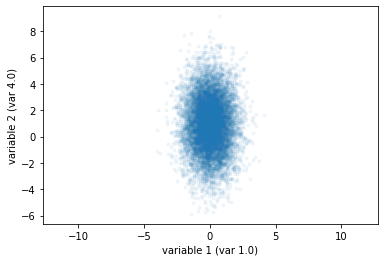

In [100]:
# plt.axis('equal') : x, y 축의 범위, 스케일을 동일하게 지정(분산이 다른 두 분포를 동일한 기준으로 보기 위해 설정함)
### ref : https://kongdols-room.tistory.com/83

mv_samples = normal_diag.sample(10000)

plt.scatter(mv_samples[:, 0], mv_samples[:, 1], marker='.', alpha=0.05)
plt.xlabel(f'variable 1 (var {normal_diag.covariance()[0][0]})')
plt.ylabel(f'variable 2 (var {normal_diag.covariance()[1][1]})')
plt.axis('equal')
plt.show()

만약, mv_normal의 parameter(loc, scale)을 변경하면, 다른 분포의 모습이 나옴

In [64]:
# 2-dim mv normal(event_shape : 2)
normal_diag2 = tfd.MultivariateNormalDiag(loc=[0,0], scale_diag=[1,10])
print("covariance matrix : \n\n", normal_diag2.covariance())
normal_diag2

covariance matrix : 

 tf.Tensor(
[[  1.   0.]
 [  0. 100.]], shape=(2, 2), dtype=float32)


<tfp.distributions.MultivariateNormalDiag 'MultivariateNormalDiag' batch_shape=[] event_shape=[2] dtype=float32>

In [97]:
print(normal_diag.covariance()[1][1])

tf.Tensor(4.0, shape=(), dtype=float32)


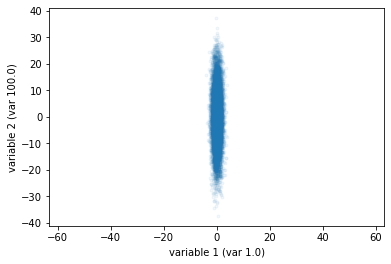

In [99]:
# plt.axis('equal') : x, y 축의 범위, 스케일을 동일하게 지정(분산이 다른 두 분포를 동일한 기준으로 보기 위해 설정함)
### ref : https://kongdols-room.tistory.com/83

mv_samples = normal_diag2.sample(10000)

plt.scatter(mv_samples[:, 0], mv_samples[:, 1], marker='.', alpha=0.05)
plt.axis('equal')
plt.xlabel(f'variable 1 (var {normal_diag2.covariance()[0][0]})')
plt.ylabel(f'variable 2 (var {normal_diag2.covariance()[1][1]})')
plt.show()

### Batched Multivariate Normal practice

In [120]:
# batched shape : 3, event shape : 2 (서로 다른 2차원 정규분포 3개 생성)

loc = [[0.,0.], 
       [0.,0.],
       [0.,0.]]
scale_diag = [[1.,1.],
              [3.,10.],
              [10.,3.]]

batched_mv_normal2 = tfd.MultivariateNormalDiag(loc=loc, scale_diag=scale_diag)
print(batched_mv_normal2)

tfp.distributions.MultivariateNormalDiag("MultivariateNormalDiag", batch_shape=[3], event_shape=[2], dtype=float32)


In [121]:
# sampling nums : 5
# samples[0] : select first sample (shape=(3,2))
# samples[0][0] : select first batch of first sample (shape=(2,))
# samples[0][0][0] : select first dimension of first batch of first sample (shape=())

samples = batched_mv_normal2.sample(5)
samples

<tf.Tensor: shape=(5, 3, 2), dtype=float32, numpy=
array([[[ -0.31539065,  -0.40762067],
        [ -1.4225442 ,  21.194162  ],
        [  0.6297174 ,   3.7282412 ]],

       [[ -1.1487712 ,   0.11190473],
        [ -6.788952  ,  20.30235   ],
        [  8.283616  ,   4.3964763 ]],

       [[  0.34568408,   1.337716  ],
        [  2.466949  ,   2.2499704 ],
        [-12.016926  ,   0.8089342 ]],

       [[  0.18917081,  -0.666765  ],
        [ -3.2634134 , -10.486143  ],
        [  1.1269723 ,  -2.15821   ]],

       [[  0.90324354,   0.1593569 ],
        [ -2.5387998 ,  -0.10044045],
        [ -8.430676  ,   3.2022994 ]]], dtype=float32)>

In [122]:
# compute log_prob
# it will return (sample size, batch_shape) value (evaluate per 2-dim distributions by single value(확률값))

batched_mv_normal2.log_prob(samples)

<tf.Tensor: shape=(5, 3), dtype=float32, numpy=
array([[-1.97069  , -7.597461 , -6.0132675],
       [-2.5039759, -9.86055  , -6.6559997],
       [-2.792368 , -5.6024885, -5.9974613],
       [-2.0780575, -6.3805294, -5.504195 ],
       [-2.2584987, -5.5972085, -6.1641626]], dtype=float32)>

In [123]:
samples_for_plot = batched_mv_normal2.sample(1000)
print(samples_for_plot.shape)

(1000, 3, 2)


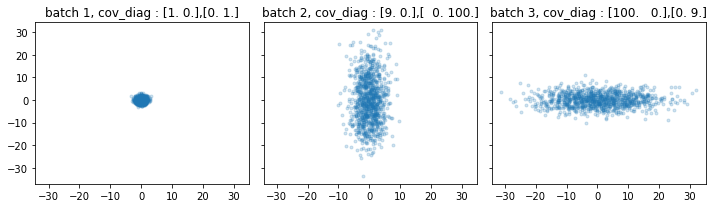

In [182]:
# plot each batch distributions

fig, axes = (plt.subplots(1,3, sharex=True, sharey=True, figsize=(10,3)))
titles = [f'batch 1, cov_diag : {batched_mv_normal2.covariance()[0][0]},{batched_mv_normal2.covariance()[0][1]}',
          f'batch 2, cov_diag : {batched_mv_normal2.covariance()[1][0]},{batched_mv_normal2.covariance()[1][1]}',
          f'batch 3, cov_diag : {batched_mv_normal2.covariance()[2][0]},{batched_mv_normal2.covariance()[2][1]}',]

for i, (ax, title) in enumerate(zip(axes, titles)):
    samples_per_batch = samples_for_plot[:, i, :]
    ax.scatter(samples_per_batch[:, 0], samples_per_batch[:, 1], marker='.', alpha=0.2)
    ax.set_title(title)
plt.tight_layout()
plt.show()